In [16]:
import pandas as pd
import numpy as np
from datetime import datetime, date


file = '311_Service_Requests_from_2010_to_Present.csv' 
population = '2010+Census+Population+By+Zipcode+(ZCTA).csv'
row_count = 1000
datafile = pd.read_csv(file, usecols = ["Created Date", "Complaint Type", "Incident Zip", "Borough"], dtype = 'str', chunksize=row_count)
dataAll = pd.DataFrame()

for chunk in datafile: 
    data =  chunk.loc[(chunk['Created Date'].str.contains('2017'))]

    
    if not data.empty:
        dataAll = pd.concat([dataAll, data], ignore_index=True)

I initially tried to load the entire CSV file but could not because the data was too big, so I used the chunking method.
This gives us all the complaint data, but it includes unspecified rows.

In [17]:
dataAll = dataAll[~dataAll.Borough.str.contains("Unspecified")]

We need to know top 10 complaints, and list them to use later.

In [18]:
top_10_complaints = dataAll['Complaint Type'].value_counts().nlargest(10)
top_10_list = top_10_complaints.index.values.tolist()
datatop10 = dataAll.loc[dataAll['Complaint Type'].isin(top_10_list)]

We can group by borough and count the number of times each complaint types appears.

In [19]:
dataComp = datatop10.groupby(['Borough', 'Complaint Type']).size()

This comes back as a groupby, so we can clean this a little by resetting the index and column name for use later as a dataframe

In [20]:
dataComp2 = dataComp.to_frame(name = 'Count').reset_index()
dataComp2

,Borough,Complaint Type,Count
0,BRONX,Blocked Driveway,24574
1,BRONX,HEAT/HOT WATER,68718
2,BRONX,Illegal Parking,16122
3,BRONX,Noise,3134
4,BRONX,Noise - Residential,57663
5,BRONX,Noise - Street/Sidewalk,14025
6,BRONX,Street Condition,11761
7,BRONX,Street Light Condition,18410
8,BRONX,UNSANITARY CONDITION,24561
9,BRONX,Water System,10221


We can make a stacked bar plot of the 10 complaint types to help us visualize how the complaints break down in each Borough

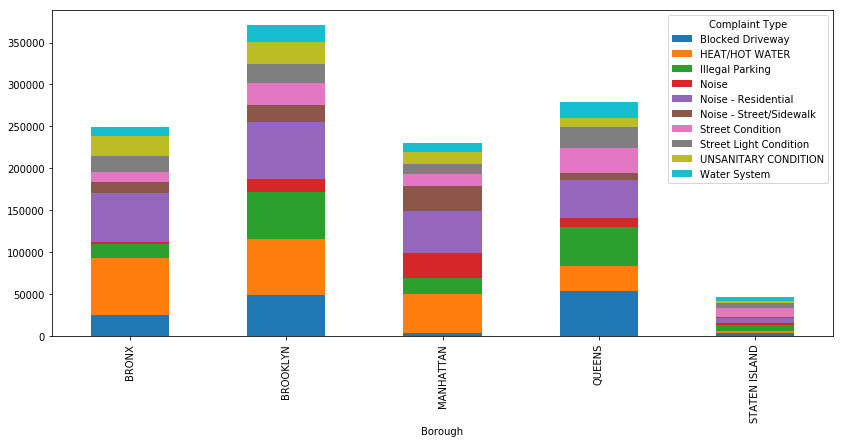

In [21]:
%matplotlib inline
dataComp3 = dataComp2.groupby(['Borough', 'Complaint Type']).sum().unstack('Complaint Type')
dataComp3.columns = dataComp3.columns.droplevel()
dataComp3.plot(kind='bar', stacked = True, figsize=(14,6))

With borough done, we can now look at the complaint counts by zip code

This shows all the zip codes and their complaints, but we need only the ten most populated zip codes. So we need to use the census data from 2010, by zip code. We can merge the two sets on similar zip codes that appear on our NYC zip codes. This gives us all the complaints that belong in the top 10 complaints with their corresponding zip code population.

We will use this for both the second and third questions.

In [22]:
dataPop = pd.read_csv(population, dtype = 'str')
dataPop = dataPop.rename(columns={'Zip Code ZCTA': 'Incident Zip'})
dc = pd.merge(dataAll, dataPop, on = 'Incident Zip')
dc

,Created Date,Complaint Type,Incident Zip,Borough,2010 Census Population
0,01/13/2017 12:15:46 PM,Building/Use,11234,BROOKLYN,87757
1,09/23/2017 09:21:05 PM,Graffiti,11234,BROOKLYN,87757
2,03/07/2017 10:06:00 AM,Building/Use,11234,BROOKLYN,87757
3,03/29/2017 10:35:45 AM,Building/Use,11234,BROOKLYN,87757
4,03/30/2017 09:40:24 AM,General Construction/Plumbing,11234,BROOKLYN,87757
5,08/27/2017 04:59:51 PM,Overgrown Tree/Branches,11234,BROOKLYN,87757
6,06/30/2017 08:51:29 AM,Dead/Dying Tree,11234,BROOKLYN,87757
7,09/01/2017 11:11:26 AM,Dead/Dying Tree,11234,BROOKLYN,87757
8,07/05/2017 09:46:41 AM,Graffiti,11234,BROOKLYN,87757
9,10/13/2017 05:52:31 PM,Root/Sewer/Sidewalk Condition,11234,BROOKLYN,87757


Since we want zip code populations, we do not want multiple instances of zip code populations, so we can drop any duplicates and have their corresponding populations.

In [23]:
dc1 = dc.drop_duplicates(subset = 'Incident Zip').sort_values(by=["2010 Census Population"], ascending = False)

We now only need the 10 most populated zip codes, so we can cut down our dataframe to show just that.

In [24]:
dcc = dc1.astype({"2010 Census Population": int}).sort_values(by=["2010 Census Population"], ascending = False).nlargest(10, '2010 Census Population')
dcc = dcc.drop(columns=['Created Date', 'Complaint Type', 'Borough']).reset_index(drop=True)
dcc

,Incident Zip,2010 Census Population
0,11368,109931
1,11226,101572
2,11373,100820
3,11220,99598
4,11385,98592
5,10467,97060
6,10025,94600
7,11208,94469
8,11236,93877
9,11207,93386


We can now break down the top ten complaints by zip codes, much like how we broke complaints by boroughs before. 

In [25]:
dataCompZip = datatop10.groupby(['Incident Zip', 'Complaint Type']).size()
dataCompZipf = dataCompZip.to_frame(name = 'Count').reset_index() 
dataCompZipf 

,Incident Zip,Complaint Type,Count
0,00083,Blocked Driveway,1
1,00083,Illegal Parking,2
2,00083,Noise - Street/Sidewalk,1
3,10000,Illegal Parking,2
4,10000,Noise - Residential,1
5,10000,Noise - Street/Sidewalk,59
6,10000,Street Condition,34
7,10000,Street Light Condition,1
8,10000,Water System,2
9,10001,Blocked Driveway,136


Here are the top 10 zip codes broken down into the top 10 complaints.

In [26]:
top_10_zips = dcc['Incident Zip'].tolist()
ziptop10 = dataCompZipf.loc[dataCompZipf['Incident Zip'].isin(top_10_zips)]
ziptopcombined = ziptop10.groupby(by=['Incident Zip'])['Count'].sum()
ziptop10

,Incident Zip,Complaint Type,Count
226,10025,Blocked Driveway,125
227,10025,HEAT/HOT WATER,2397
228,10025,Illegal Parking,735
229,10025,Noise,1398
230,10025,Noise - Residential,2085
231,10025,Noise - Street/Sidewalk,1224
232,10025,Street Condition,628
233,10025,Street Light Condition,21
234,10025,UNSANITARY CONDITION,714
235,10025,Water System,481


And here is the total count of complaints in the top zip codes.

In [27]:
ziptopcombined.to_frame(name = 'Combined Count').reset_index().sort_values(by=["Combined Count"], ascending = False)

,Incident Zip,Combined Count
5,11226,22219
1,10467,19661
9,11385,16327
2,11207,14286
3,11208,14189
7,11368,12813
8,11373,11897
4,11220,10359
6,11236,10237
0,10025,9808


In order to obtain the total population of a borough, we can take all instances of the unique zip codes list (dc1) that belong to one of the boroughs and add them together.

We get the following list of boroughs and their corresponding population size.

In [28]:
dc2 = dc1.drop(columns=['Created Date', 'Complaint Type', 'Incident Zip'])
dc2 = dc2.astype({"2010 Census Population": int})
dc3 = dc2.groupby(by=['Borough'])['2010 Census Population'].sum().to_frame(name = 'Borough Population').reset_index()
dc3

,Borough,Borough Population
0,BRONX,1437243
1,BROOKLYN,2504700
2,MANHATTAN,1595338
3,QUEENS,2390901
4,STATEN ISLAND,468730


Before, we only needed the top ten complaints in the boroughs, but now we need to consider all the complaints. So we take our original data set (dataAll) and then total all the complaints by borough. 

In [29]:
count_data = dataAll.groupby(['Borough', 'Complaint Type']).size()
count_data = count_data.to_frame(name = 'Complaints').reset_index().drop(columns=['Complaint Type'])
CD1 = count_data.groupby(by=['Borough'])['Complaints'].sum()
CD2 = CD1.to_frame(name = 'Total Complaints').reset_index()

Finally, we just need to divide the total number of complaints of the borough by that boroughs population in order to index them and compare.

In [30]:
CD3 = pd.merge(dc3, CD2, on = 'Borough')
CD3['Complaint Index'] = CD3['Total Complaints']/CD3['Borough Population']
CD3.sort_values(by=["Complaint Index"], ascending = False)

,Borough,Borough Population,Total Complaints,Complaint Index
0,BRONX,1437243,450933,0.313749
1,BROOKLYN,2504700,771322,0.307950
2,MANHATTAN,1595338,480316,0.301075
4,STATEN ISLAND,468730,127136,0.271235
3,QUEENS,2390901,589971,0.246757


Here we can see that those in the Bronx happen to be the "biggest complainers", at least for the year of 2017. This could be 